# Clustering

In [1]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

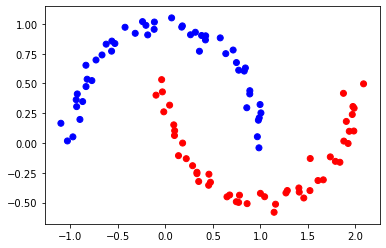

In [76]:
X, y = make_moons(100, noise=0.05, random_state=4)
#X, y = make_blobs(50, n_features=2, random_state=42)

colors = np.array(['blue', 'red', 'green', 'magenta', 'peachpuff', 'forestgreen',
                   'pink', 'brown', 'darkturquoise', 'firebrick'])

plt.scatter(X[:,0], X[:,1], c=colors[y])

### K-Means

* assumption: clusters are spherical and have the same radius
* based on Euclidean distance
* bad with 10+ features
* hyperparameter: n_clusters
* **scale your data**

In [43]:
from sklearn.cluster import KMeans

In [44]:
m = KMeans(n_clusters=6)
m.fit(X)
ypred = m.predict(X)

In [45]:
cent = m.cluster_centers_
cent

array([[ 1.06815774, -0.4297376 ],
       [ 0.06931353,  0.86542875],
       [-0.81204766,  0.48758707],
       [ 1.85386125,  0.05989581],
       [ 0.23601716, -0.08683087],
       [ 0.86506217,  0.44506627]])

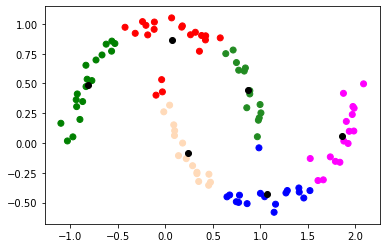

In [46]:
plt.scatter(X[:,0], X[:,1], c=colors[ypred])
plt.scatter(cent[:,0], cent[:,1], c='black')

### Agglomerative Clustering

In [47]:
import seaborn as sns

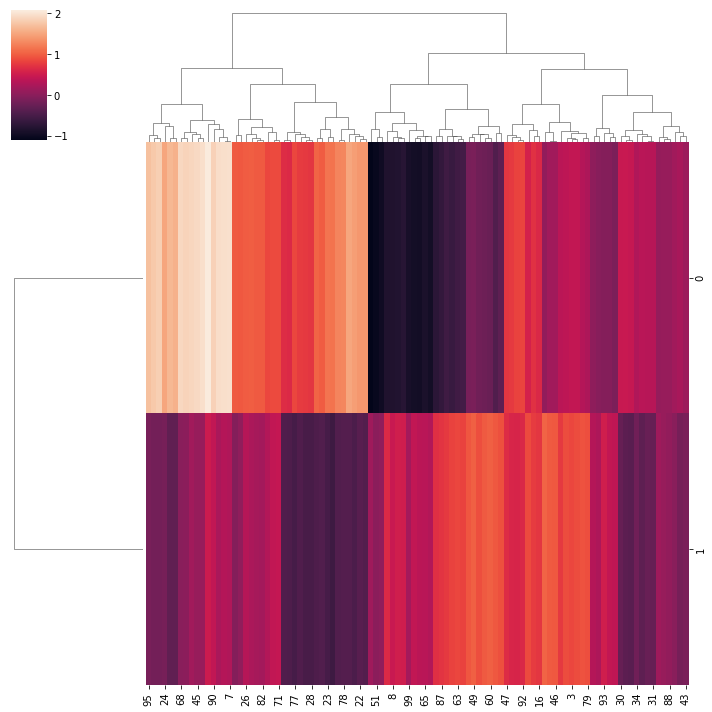

In [48]:
sns.clustermap(X.T)

### DBSCAN

* eps: minimum distance for 2 points in the same cluster
* min_samples: minimum number of points in the same cluster
* detects **outliers**

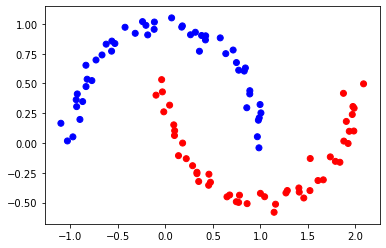

In [54]:
from sklearn.cluster import DBSCAN

m = DBSCAN(eps=0.25, min_samples=5)
m.fit(X)

c = m.fit_predict(X)


c = m.labels_.astype(np.int)

plt.scatter(X[:,0], X[:,1], c=colors[c])

## Clustering MNIST Data

In [29]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [77]:
X = xtrain[:1000]
y = ytrain[:1000]

In [78]:
X = X.reshape(1000, 28*28)
X.shape

(1000, 784)

#### Too many features - curse of dimensionality

* To reduce the number of features, we will use PCA
* before the PCA, de-mean the data

In [79]:
from sklearn.decomposition import PCA

In [97]:
# set data to mean of zero
X = X - X.mean(axis=0)

In [98]:
pca = PCA(n_components=20)
pca.fit(X)

PCA(n_components=20)

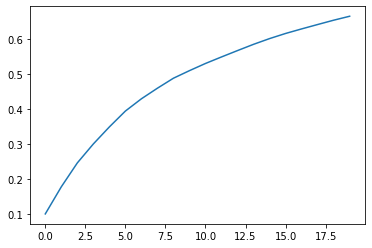

In [99]:
import numpy as np
plt.plot(range(20), np.cumsum(pca.explained_variance_ratio_))

In [100]:
Xt = pca.transform(X)
Xt.shape

(1000, 20)

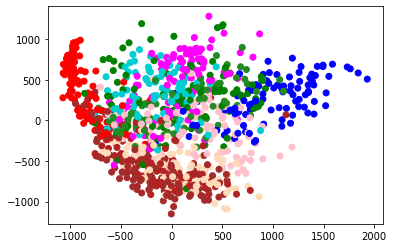

In [101]:
plt.scatter(Xt[:,0], Xt[:,1], c=colors[y])

#### Pipeline: PCA -> TSNE -> Clustering

In [102]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [103]:
Xscaled = MinMaxScaler().fit_transform(Xt)

In [104]:
# reduces to two dimensions and tries to preserve distance
t = TSNE()
t.fit(Xscaled)
ts = t.fit_transform(Xscaled)
ts.shape

(1000, 2)

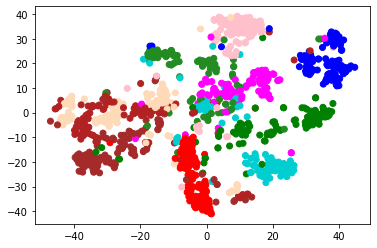

In [105]:
plt.scatter(ts[:,0], ts[:,1], c=colors[y])

#### Cluster the TSNE output

TSNE output is still scaled nicely

In [107]:
m = KMeans(n_clusters=10)
m.fit(ts)

KMeans(n_clusters=10)

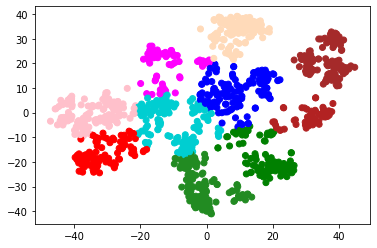

In [108]:
ypred = m.predict(ts)
plt.scatter(ts[:,0], ts[:,1], c=colors[ypred])

#### improvement: play with the perplexity parameter of TSNE!